<a href="https://colab.research.google.com/github/saincoder404/NLP_Projects/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Resume Screening Model***

***Import libraries***

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [7]:
dataset = pd.read_csv('/content/ResumeDataSet.csv')

In [8]:
dataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
dataset.shape

(962, 2)

In [10]:
dataset['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [11]:
dataset['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

***Visualization***

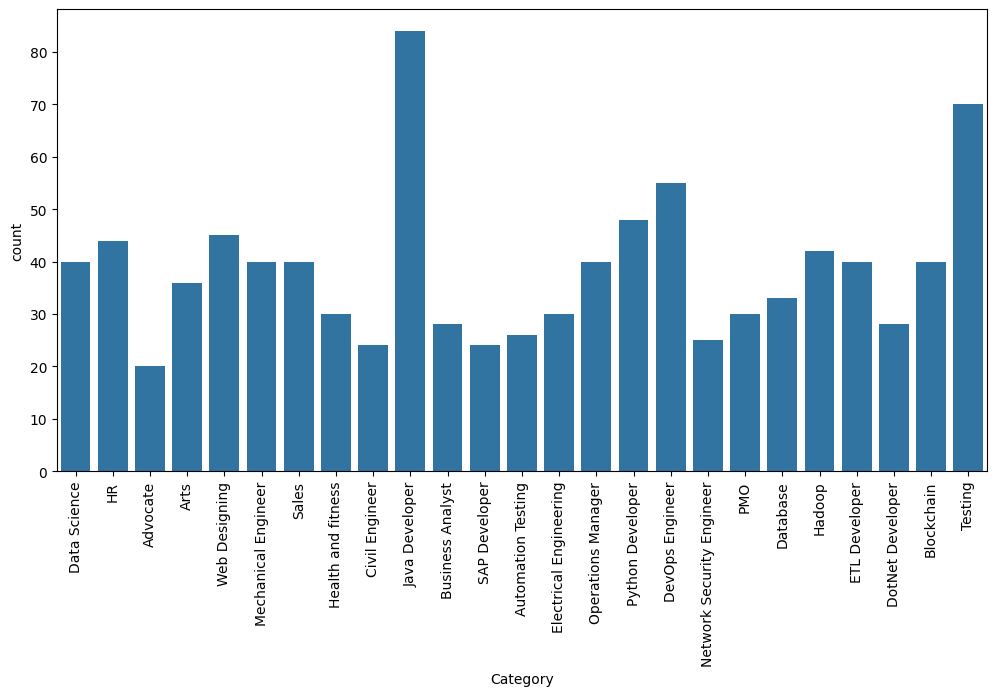

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category',data=dataset)
plt.xticks(rotation=90)
plt.show()

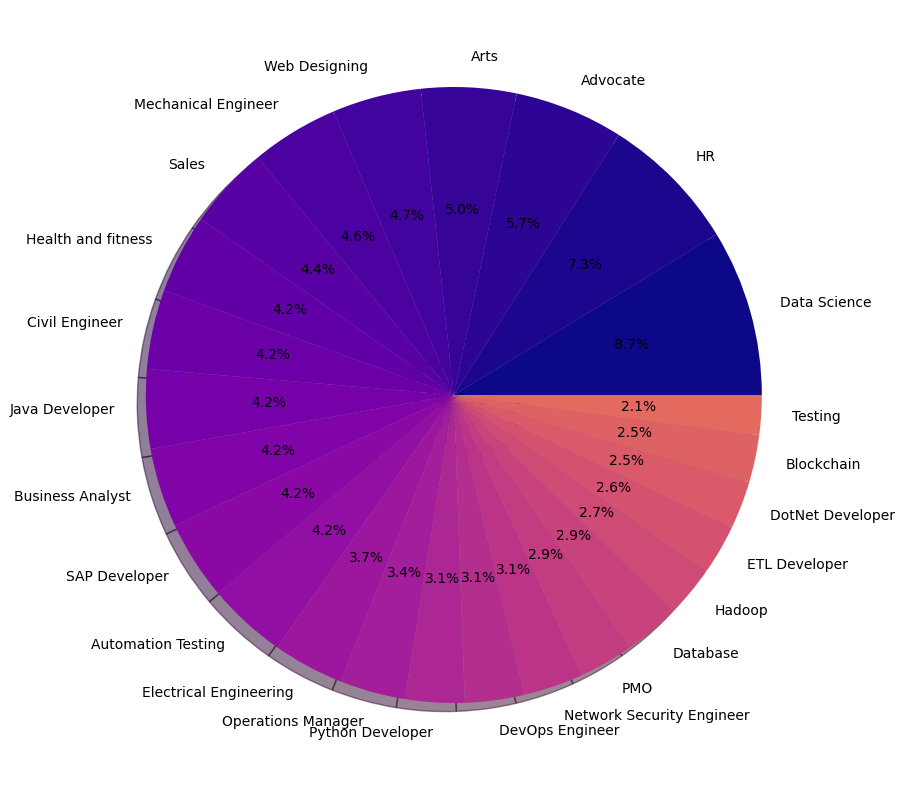

In [13]:
counts = dataset['Category'].value_counts()
labels = dataset['Category'].unique()
plt.figure(figsize=(10,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,40)))
plt.show()

***Explore resume***

In [14]:
dataset['Category'][0]

'Data Science'

In [15]:
dataset['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

***Cleaning text***

In [16]:
# urls, hashtags, mentions, special letters, punctuation

import re

def cleanResume(text):
  cleanText = re.sub('http\S+\s',' ',text)
  cleanText = re.sub('RT|cc',' ',cleanText)
  cleanText = re.sub('@\S+', ' ', cleanText)
  cleanText = re.sub('#\S+', ' ', cleanText)
  cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
  cleanText = re.sub(r'[^x00-x7f]', ' ', cleanText)
  cleanText = re.sub('\s+', ' ', cleanText)
  return cleanText

In [17]:
cleanResume('Hi this is [;''[09]] #shahid https://web.whatsapp.com/ khan @gmail.com hhh')

'Hi this is 09 khan hhh'

In [18]:
# clean actual text
dataset['Resume'] = dataset['Resume'].apply(lambda x: cleanResume(x))

In [19]:
dataset['Resume'][0]

'Skills Programming Languages P thon pandas nump scip scikit learn matplotlib Sql Java JavaScript JQuer Machine learning Regression SVM Na ve Ba es KNN Random Forest Decision Trees Boosting techniques Cluster Anal sis Word Embedding Sentiment Anal sis Natural Language processing Dimensionalit reduction Topic Modelling LDA NMF PCA Neural Nets Database Visuali ations M sql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotl kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka P thon Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuer Exprience 24 months P thon Exprience 24 monthsCompan Details compan Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technolog Assisted Review assists in a elerating the review pr

***convert categorical variables into numerical***

In [20]:
le = LabelEncoder()

In [21]:
dataset['Category'] = le.fit_transform(dataset['Category'])

In [22]:
dataset

,Category,Resume
0,6,Skills Programming Languages P thon pandas num...
1,6,Education Details Ma 2013 to Ma 2017 B E UIT R...
2,6,Areas of Interest Deep Learning Control S stem...
3,6,Skills R P thon SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Har an...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


***Vectorization***

In [23]:
tfidf = TfidfVectorizer(stop_words='english')
requiredText = tfidf.fit_transform(dataset['Resume'])

***Splitting***

In [24]:
x = requiredText
y = dataset['Category']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(769, 7271)

In [27]:
X_test.shape

(193, 7271)

***Modeling***

In [33]:
knclf = OneVsRestClassifier(KNeighborsClassifier())
knclf.fit(X_train, y_train)
y_predict = knclf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9844559585492227


***Predictive System***

In [35]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(knclf, open('model.pkl', 'wb'))

In [37]:
my_resume = """
ABOUT ME
As a dedicated ML Engineer with a fresh perspective and a strong foundation in
programming, I am committed to leveraging my enthusiasm for machine learning to
drive impactful solutions and continuously expand my expertise in the field.My com
mitment to excellence and teamwork makes me an ideal candidate for roles
requiring skills in machine learning, Flutter development, and effective problemsolving.
EDUCATION AND TRAIN‐
ING
[ 01/09/2019 – 01/07/2023 ] Bachelor of Science in Software Engineering
Hazara University Mansehra www.hu.edu.pk
City: Mansehra | Country: Pakistan | Field(s) of study: Information and
Communication Technologies: Software and applications development and analysis
| Final grade: CGPA 3.20/4.0 | Thesis: Voice Based Train Automatic System
DIGITAL SKILLS
My Digital Skills
Python Language - Basic knowledge | Python for data analysis (NumPy, Pandas) |
Python libraries NumPy, SciPy, Mathplotlib, Seaborn, Sklearn, Keras, PyTorch,
TensorFlow | Data Science | Data Collection, Data Processing, Data Analysis, Data
Visualisation | Machine Learning. | Deep Learning frameworks:
PyTorch,Tensorflow,Keras
WORK EXPERIENCE
[ 06/07/2023 – 31/01/2024 ] Flutter Developer
Address: Metex Labz, Mini Commercial Phase 7 Bahria Town, Islamabad, Pakistan
| Business or sector: Information and communication
Activities:
• Collaborate on Flutter app with seniors developers.
• Develop clean, efficient code and contribute to reviews.
• Enhance existing apps and add new features.
• Stay updated on Flutter trends and actively engage in team meetings
[ 02/01/2024 – Current ] Data analyst
Address: worklyrow, Islamabad, Pakistan
• Data Cleaning
• Exploratory Data Analysis
• Data Visualization
• Statistical Analysis
• Predictive Model
Shahid Hussain
Gender: Male Date of birth: 03/01/2000 Nationality: Pakistani
 Home : Swabi, KPK, Pakistan, 23430, Swabi, Pakistan
 Work : Mini Commercial Phase 7 Bahria Town, Islamabad, Pakistan
 Email: Kancain00@gmail.com  Phone: (+92) 3474898122
 LinkedIn: https://www.linkedin.com/in/sain-coder
PROJECTS
[ 06/09/2023 – 10/12/2023 ] Pictro AI
Pictro AI is an innovative Flutter-based IOS app that harnesses the power of AI to
transform text prompts into mesmerizing artworks. With customizable 'models' and
'styles,' users can explore a wide range of artistic expressions, from minimalism to
renaissance aesthetics. Turning words into stunning visual narratives and
experience the limitless possibilities of AI-generated art. Pictro AI is a testament to
our expertise in AI development and our passion for pushing creative boundaries.
[ 12/12/2023 – 25/12/2023 ] Heart Disease Prediction
Developed a Heart Disease Prediction system using Machine Learning and Python,
utilizing a dataset from Kaggle. Designed to determine whether an individual has
heart disease or is in good health, this project showcases my proficiency in machine
learning and data analysis. Implemented predictive models to enhance accuracy,
contributing to a valuable application in the healthcare domain.
[ 27/03/2024 – Current ] Diabetes prediction system
Diabetes prediction System Empowering individuals with advanced AI technology to
forecast potential diabetic risks based on personalized health data. Stay ahead of
your health with proactive insights and tailored recommendations for a healthier
lifestyle.
• EDA
• Model training
• Model saving
• Streamlit Application
• API development
• Flutter app integration
CERTIFICATIONS
[ 04/06/2023 – 06/10/2023 ] Introduction to Generative AI, Google Clouding training by Google Cloud
This was an introductory level microlearning course aimed at explaining what
Generative AI is, how it is used, and how it differs from traditional machine learning
methods. It also covers Google Tools to help you develop your own Gen AI apps.
[ 14/07/2023 – 24/12/2023 ] IBM Data Science Professional Certificate
• What is Data Science?
• Tools for Data Science
• Data Science Methodology
• Python for Data Science, AI & Development
• Python Project for Data Science
• Databases and SQL for Data Science with Python
• Data Analysis with python
• Data Visualization with python
• Machine Learning with Python
• Applied Data Science Capstone
Other language(s):
English
LISTENING B2 READING C1 WRITING B2
SPOKEN PRODUCTION B1 SPOKEN INTERACTION B1
Urdu
LISTENING B1 READING B1 WRITING B1
SPOKEN PRODUCTION B2 SPOKEN INTERACTION B2
[ 04/10/2023 – 10/10/2023 ] Introduction to Artificial Intelligence (AI), IBM by Rav Ahuja
• What is AI? Applications and Example of AI
• AI concepts, Terminology, and Application Areas
• AI: Issues, Concern and Ethical Considerations
• The Future with AI, and AI in Action
[ 14/10/2023 – Current ] IBM AI Engineering Professional Certificate
• Machine Learning with Python
• Introduction to Deep Learning & Neural Networks with Keras
• Introduction to Computer Vision and Image Processing
• Deep Neural Networks with PyTorch
• Building Deep Learning Models with TensorFlow
• AI Capstone Project with Deep Learning
LANGUAGE SKILLS
Mother tongue(s): Pashto
Levels: A1 and A2: Basic user; B1 and B2: Independent user; C1 and C2: Proficient user
 """

In [39]:
# load the trained model
clf = pickle.load(open('model.pkl', 'rb'))

# clean the input resume
clean_resume = cleanResume(my_resume)

# transform the cleaned resume using the trained tfidfvectorized
input_features = tfidf.transform([clean_resume])

# make a prediction using the trained model
prediction = clf.predict(input_features)

#Map Catogery ID to catogery name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    18: "ETL Developer",
    10: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and Fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate"
}

category_name = category_mapping.get(prediction[0], "Unknown")
print(f"Predicted Category: {category_name}")

print(prediction)

Predicted Category: Data Science
[6]
